## Анализируем лица с помощью искусственного интеллекта

Большое количество контента в интернет/соц.сетях - это изображения. Мы можем использовать нейросетевые модели для извлечения из изображений глубинной информации о содержимом, например:
 * Для каждого из людей на фото - пол, возраст, испытываемые эмоции, наличие аксессуаров на лице
 * Список объектов на фотографии
 * Контекст: в помещении, на улице
 * Тип фото: портрет, групповое фото, пейзаж
 * Цветовая гамма
 
В нашем случае мы сконцентрируемся на извлечении информации о людях. Для извлечения эмоций используем библиотеку [DeepFace](https://pypi.org/project/deepface/):

In [3]:
import sys
!{sys.executable} -m pip install deepface

In [1]:
from deepface.detectors import FaceDetector
from deepface import DeepFace
import cv2
import imageio.v3 as iio
import matplotlib.pyplot as plt

Для анализа лица служит функция `analyze`:

In [2]:
DeepFace.analyze("dsh_fall_sqr_small.JPG")

Action: race: 100%|██████████| 4/4 [00:05<00:00,  1.47s/it]   


{'emotion': {'angry': 11.140315072574028,
  'disgust': 0.0011833501549554709,
  'fear': 0.11831042603006077,
  'happy': 83.5462729389993,
  'sad': 0.11827849330347696,
  'surprise': 0.2650479170737168,
  'neutral': 4.810592360567136},
 'dominant_emotion': 'happy',
 'region': {'x': 33, 'y': 53, 'w': 86, 'h': 86},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.6553309038281441,
  'indian': 3.0351547524333,
  'black': 0.19891236443072557,
  'white': 45.8880752325058,
  'middle eastern': 23.768138885498047,
  'latino hispanic': 26.454389095306396},
 'dominant_race': 'white'}

Поскольку такая функция анализирует только одно лицо, нам необходимо сначала извлечь все лица на фотографии. Это можно сделать с помощью `FaceDetector`:

[{'box': [483, 198, 40, 43],
  'confidence': 0.9999978542327881,
  'keypoints': {'left_eye': (492, 214),
   'right_eye': (511, 211),
   'nose': (501, 224),
   'mouth_left': (495, 232),
   'mouth_right': (513, 230)}},
 {'box': [921, 169, 57, 71],
  'confidence': 0.9999954700469971,
  'keypoints': {'left_eye': (938, 195),
   'right_eye': (964, 195),
   'nose': (951, 210),
   'mouth_left': (939, 221),
   'mouth_right': (962, 221)}},
 {'box': [633, 198, 51, 66],
  'confidence': 0.9999659061431885,
  'keypoints': {'left_eye': (647, 225),
   'right_eye': (671, 224),
   'nose': (659, 240),
   'mouth_left': (648, 247),
   'mouth_right': (672, 246)}},
 {'box': [350, 187, 41, 50],
  'confidence': 0.9997923970222473,
  'keypoints': {'left_eye': (362, 206),
   'right_eye': (382, 203),
   'nose': (376, 209),
   'mouth_left': (366, 224),
   'mouth_right': (386, 221)}}]

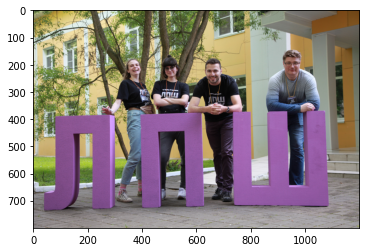

In [3]:
detector = FaceDetector.build_model("mtcnn")

img = iio.imread("http://psy.msu.ru/science/conference/summer/2019/photo/011.jpg")
plt.imshow(img)
detector.detect_faces(img)

Теперь построим свою функцию `analyze`, которая сначала выделяет лица, и потом анализирует каждое из них: 

In [4]:
def analyze(img):
    res = detector.detect_faces(img)
    z = []
    for x in res:
        bb = x['box']
        fc = img[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2],:]
        a = DeepFace.analyze(fc,enforce_detection=False,prog_bar=False)
        z.append({ "box" : bb, "face" : fc, 
                   "emotion" : a['emotion'], "dominant_emotion" : a['dominant_emotion'], 
                   "age" : a['age'], "gender" : a['gender']})
    return z
    
analyze(img)

[{'box': [483, 198, 40, 43],
  'face': array([[[ 27,  24,  19],
          [ 27,  26,  22],
          [ 26,  25,  23],
          ...,
          [ 54,  42,  44],
          [ 49,  37,  39],
          [ 42,  30,  30]],
  
         [[ 25,  22,  17],
          [ 26,  23,  18],
          [ 24,  23,  19],
          ...,
          [ 43,  33,  34],
          [ 38,  28,  26],
          [ 35,  25,  23]],
  
         [[ 23,  20,  15],
          [ 22,  19,  14],
          [ 22,  19,  14],
          ...,
          [ 33,  25,  22],
          [ 32,  24,  21],
          [ 32,  24,  22]],
  
         ...,
  
         [[ 50,  36,  27],
          [ 39,  26,  18],
          [ 35,  26,  19],
          ...,
          [163, 128, 124],
          [139, 106,  99],
          [108,  74,  64]],
  
         [[ 52,  38,  29],
          [ 44,  27,  19],
          [ 36,  26,  17],
          ...,
          [142, 107, 101],
          [122,  85,  76],
          [114,  78,  66]],
  
         [[ 60,  48,  34],
          [ 45

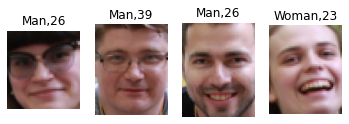

In [5]:
res = analyze(img)
fig,ax = plt.subplots(1,len(res))
for i,x in enumerate(res):
    ax[i].imshow(x['face'])
    ax[i].axis('off')
    ax[i].set_title(f"{x['gender']},{x['age']}")

### Анализируем фотографии с мероприятия

В качестве материала для анализа рекомендуется взять фотографии с какого-то мероприятия, на котором присутствует много людей. Например, посмотрите [фотографии с летней школы МГУ](http://psy.msu.ru/science/conference/summer/2019/photo/index.html).